#Import

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


# Loading the Dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Plotting and pre processing the Dataset

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("train_images.shape", train_images.shape)

print("length of train_labels",len(train_labels))

print("train_labels",train_labels)

print("test_images.shape",test_images.shape)

print("length of test_labels",len(test_labels))


train_images.shape (60000, 28, 28)
length of train_labels 60000
train_labels [9 0 0 ... 3 0 5]
test_images.shape (10000, 28, 28)
length of test_labels 10000


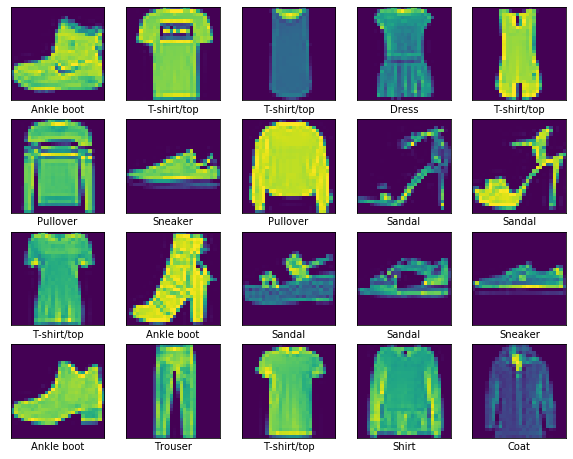

In [5]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

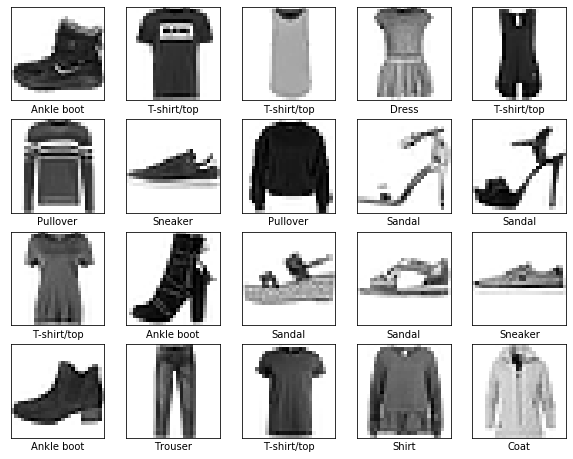

In [7]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# ANN Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5180 - acc: 0.8202
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4008 - acc: 0.8560
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3617 - acc: 0.8694
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3349 - acc: 0.8785
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3170 - acc: 0.8833
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3022 - acc: 0.8893
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2916 - acc: 0.8922
Epoch 8/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2798 - acc: 0.8975
Epoch 9/10
60000/60000 [==============================] - 4s 58us/sample - loss:

# Plotting the Output

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

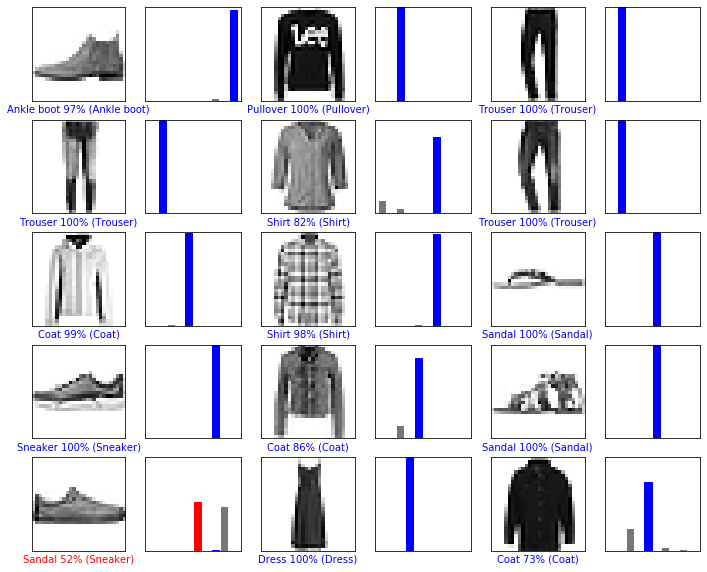

In [10]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()